In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d0 = pd.read_csv('mnist_train.csv')
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l = d0['label']
d = d0.drop('label', axis=1)

In [4]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


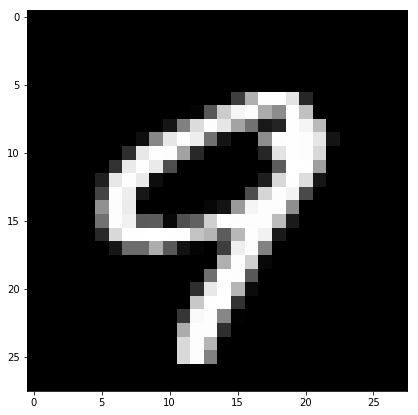

Label: 9


In [5]:
plt.figure(figsize=(7,7))

idx = 100
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print('Label:',l[idx])

In [6]:
#Pick the first 15K Data-Points to work on for time efficiency 

labels = l.head(15000)
data = d.head(15000)

print('shape of sample data = ', data.shape)

shape of sample data =  (15000, 784)


In [7]:
#Data Pre-Processing: Standardizing the Data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [8]:
#Now lets Find the co-variance matrix : A^T.A

sample_data = standardized_data

#matrix multiplication using numpy 
covariance_matrix = np.matmul(sample_data.T, sample_data)

print('shape of co-variance matrix =', covariance_matrix.shape)

shape of co-variance matrix = (784, 784)


In [9]:
#Finding top 2 eigen-value and corresponding vectors 
#to project points on vectors 

from scipy.linalg import eigh

#function will return eigen value in ascending order

values, vectors = eigh(covariance_matrix, eigvals = (782, 783))
print('eigen values: ',values)
print('Shape of eigen vectors:', vectors.shape)

vectors = vectors.T

print('Updated shape of eigen vectors:', vectors.shape)

eigen values:  [ 435532.55785282  605719.29173629]
Shape of eigen vectors: (784, 2)
Updated shape of eigen vectors: (2, 784)


In [10]:
new_coordinates = np.matmul(vectors, sample_data.T)

print('new_coordinates shape ', vectors.shape, 'X', sample_data.T.shape,'=', new_coordinates.shape )

new_coordinates shape  (2, 784) X (784, 15000) = (2, 15000)


In [11]:
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal','label'))
dataframe.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


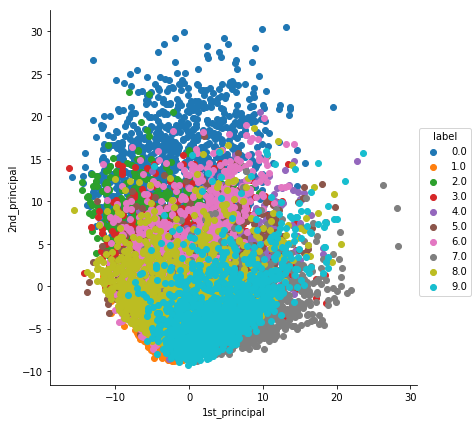

In [12]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA Using SkLearn

In [18]:
from sklearn import decomposition

pca = decomposition.PCA()

In [14]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print('shape of pca_data = ', pca_data.shape)

shape of pca_data =  (15000, 2)


In [15]:
pca_data = np.vstack((pca_data.T, labels)).T

dataframe = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal','label'))
dataframe.head()

,1st_principal,2nd_principal,label
0,-5.043613,-5.557714,1.0
1,19.305291,6.193519,0.0
2,-7.678773,-1.910302,1.0
3,-0.464764,5.525035,4.0
4,26.644284,6.366569,0.0


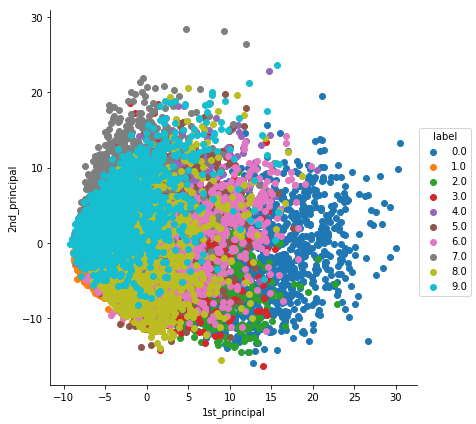

In [16]:
sns.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## t-SNE using Sk-Learn

(10000, 784) (10000,)


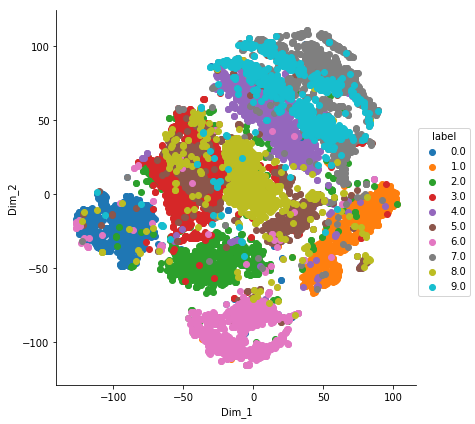

In [23]:
from sklearn.manifold import TSNE

data_1000 = standardized_data[:10000,:]
labels_1000 = labels[:10000]

print(data_1000.shape, labels_1000.shape)

model = TSNE(n_components=2,n_iter=2000 , random_state=0)

tsne_data = model.fit_transform(data_1000)


tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'label'])

sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()